In [7]:
from utils.preprocessing import OAILogParser
import matplotlib.pyplot as plt
import seaborn as sns
import logging

logging.basicConfig(level=logging.INFO)
sns.set_theme(style="darkgrid")

In [8]:
log_type = ("[DLSCH/PDSCH/PUCCH]", 23)
log_entries = { (15, 19)   : "frame",
                (20, 22)   : "slot",
                (48, 52)   : "rnti",
                (67, 70)   : "rbStart",
                (75, 78)   : "rbSize",
                (91, 93)   : "startSymbolIndex",
                (104, 106) : "nrOfSymbols",
                (123, 125): "MCS",
                (137, 138): "nrOfLayers",
                (143, 147): "TBS" 
               }
sample_log = OAILogParser(fn="../examples/0116_debug_log_1.log", log_type=log_type, log_entries=log_entries)

INFO:root:[OAILogParser]  Matched 33501 logs [DLSCH/PDSCH/PUCCH]
INFO:root:[OAILogParser]  Converted log to Pandas DataFrame


<AxesSubplot:xlabel='timestamp', ylabel='MCS'>

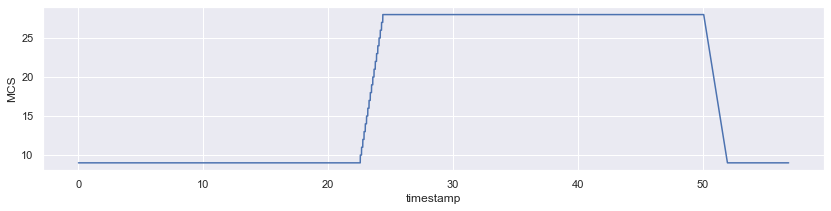

In [13]:
sample_log.logs['nrOfPRB'] = sample_log['rbSize']*sample_log['nrOfSymbols']
sample_log.logs['timestamp'] = sample_log['sn']*0.5*0.001    # second

fig, ax = plt.subplots(figsize=(14, 3))
sns.lineplot(ax=ax, data=sample_log.logs, x="timestamp", y="MCS")

<AxesSubplot:xlabel='timestamp', ylabel='nrOfPRB'>

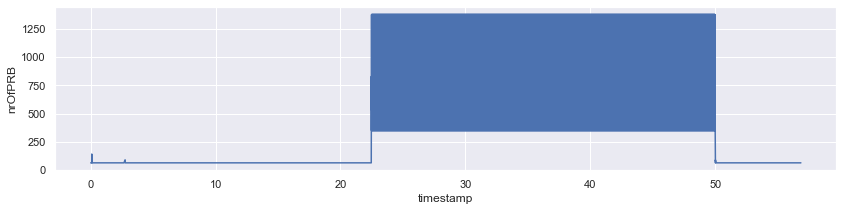

In [14]:
fig, ax = plt.subplots(figsize=(14, 3))
sns.lineplot(ax=ax, data=sample_log.logs, x="timestamp", y="nrOfPRB")